<a href="https://colab.research.google.com/github/wakhunguadams/Cervical-cancer-prediction/blob/main/cervical_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Loading data
[Data source kaggle](https://www.kaggle.com/datasets/ranzeet013/cervical-cancer-dataset/data)

In [ ]:
cancer=pd.read_csv("/content/cervical-cancer_csv.csv")

In [ ]:
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#number of rows and columns in the data
cancer.shape

(835, 36)

In [ ]:
#summary of the data
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [ ]:
#statistical summaries of the data
cancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking null values
cancer.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

# Handling missing values

In [ ]:
# droping columns with high missing values
cancer.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], inplace=True)

In [ ]:
#replace the other missing values with their means
cancer.fillna(cancer.mean(),inplace=True)

In [ ]:
cancer.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


# univeriate analysis

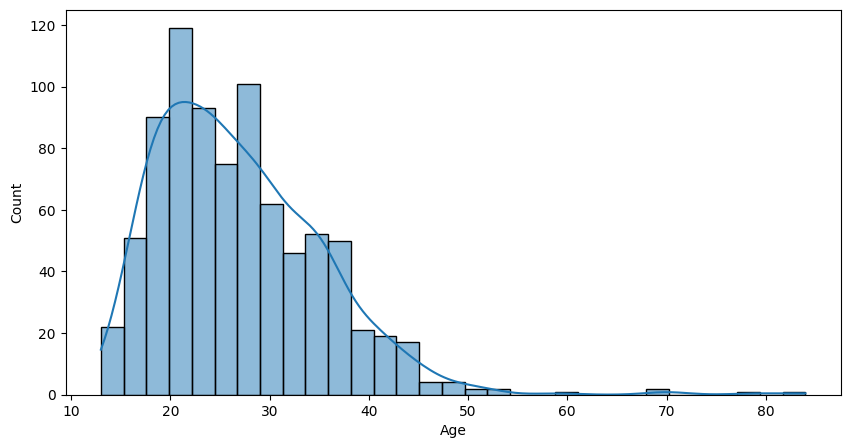

In [ ]:
#age distribution
plt.figure(figsize=(10,5))
sns.histplot(cancer,x="Age",kde=True)
plt.show()

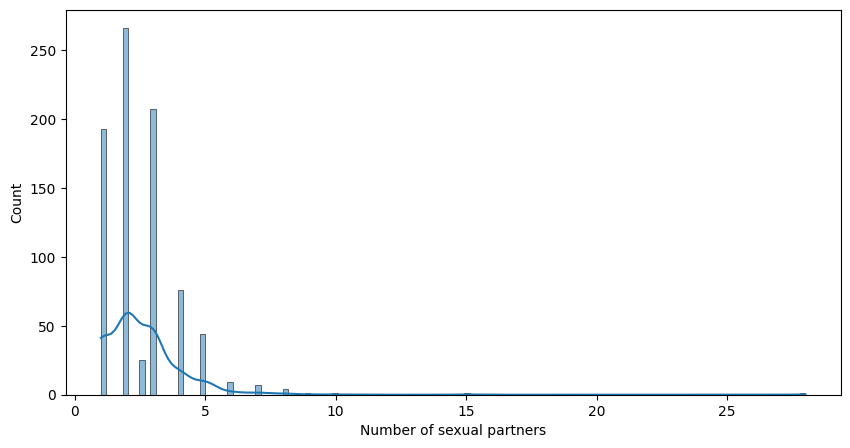

In [ ]:
# Number of sexual partners distribution
plt.figure(figsize=(10,5))
sns.histplot(cancer, x="Number of sexual partners", kde=True)
plt.show()

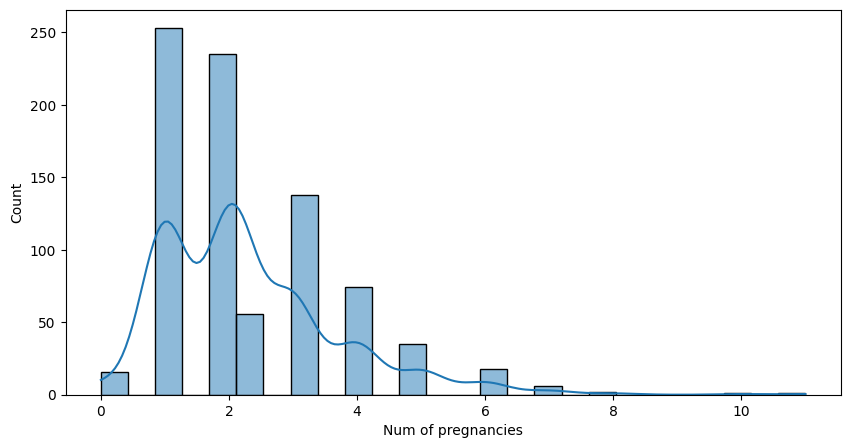

In [ ]:
# Number of pregnancies distribution
plt.figure(figsize=(10,5))
sns.histplot(cancer, x="Num of pregnancies", kde=True)
plt.show()

<ipython-input-40-faa8da56ef5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cancer, x="Biopsy",palette=["#3498db", "#e74c3c"])


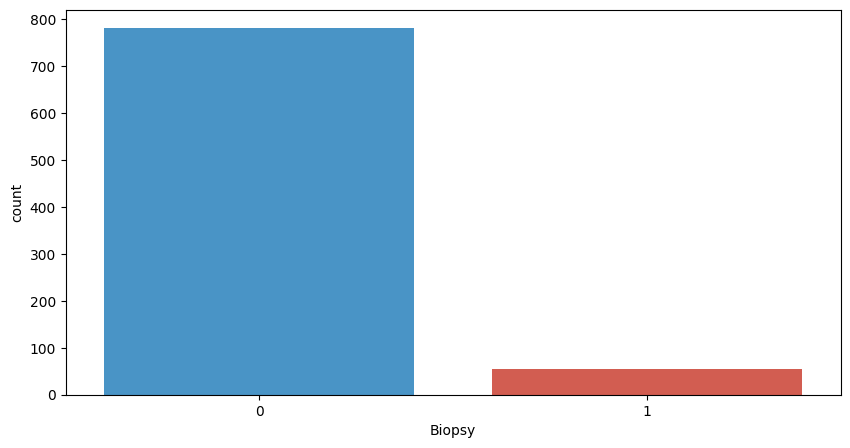

In [ ]:
# visualizing the distribution of target
plt.figure(figsize=(10,5))
sns.countplot(cancer, x="Biopsy",palette=["#3498db", "#e74c3c"])
plt.show()

In [ ]:
cancer["Biopsy"].unique()

array([0, 1])

Bivariate analysis

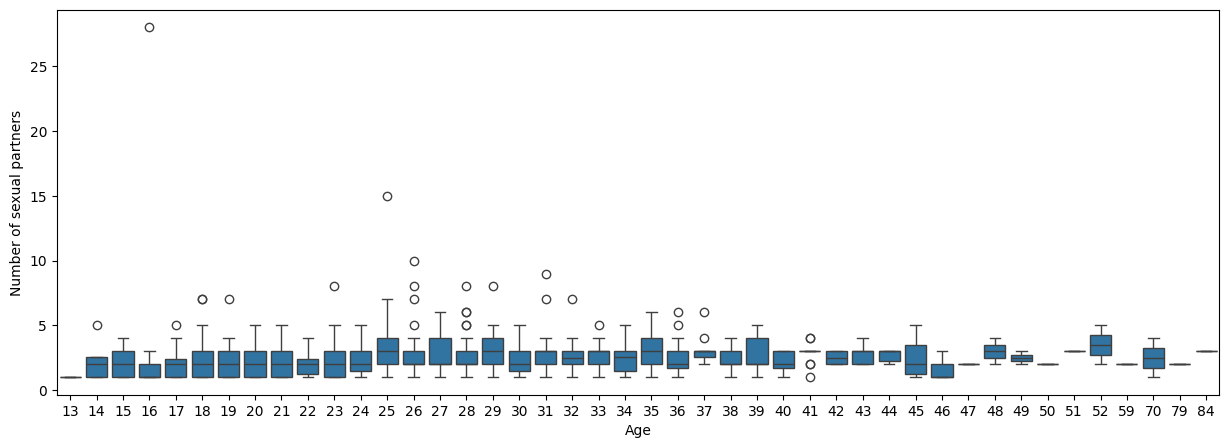

In [ ]:
#age and number of sexual partners
plt.figure(figsize=(15,5))
sns.boxplot(cancer, x="Age", y="Number of sexual partners")
plt.show()

Correlation dataframe

In [ ]:
#analysing how data is correlated with target(Biopsy)
corrdf=cancer.drop('Biopsy',axis=1)

<Axes: title={'center': 'Correlation With Biopsy'}>

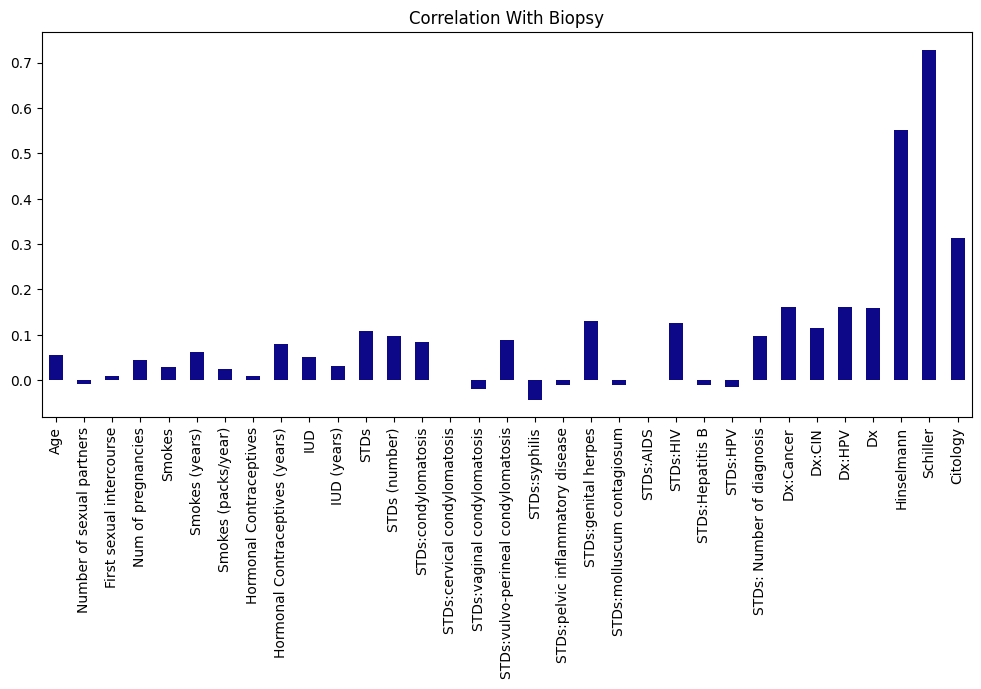

In [ ]:
corrdf.corrwith(cancer['Biopsy']).plot.bar(
    title = 'Correlation With Biopsy',
    figsize = (12, 5),
    cmap = 'plasma'
)

In [ ]:
#Selecting fetures and target
X = cancer.drop("Biopsy", axis=1)
y = cancer["Biopsy"]

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((668, 33), (668,))

In [ ]:
X_test.shape, y_test.shape

((167, 33), (167,))

In [ ]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

In [ ]:
# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"{name}:\n{classification_report(y_test, y_pred)}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       157
           1       0.44      0.40      0.42        10

    accuracy                           0.93       167
   macro avg       0.70      0.68      0.69       167
weighted avg       0.93      0.93      0.93       167


Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       157
           1       0.58      0.70      0.64        10

    accuracy                           0.95       167
   macro avg       0.78      0.83      0.81       167
weighted avg       0.96      0.95      0.95       167


Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       157
           1       0.50      0.30      0.37        10

    accuracy                           0.94       167
   macro avg       0.73      0.64      0.67       167
weighted avg       0.

In [ ]:
# Select the best model (based on accuracy)
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]

In [ ]:
best_model

DecisionTreeClassifier()

In [ ]:
#the best model is decision tree classifier
y_pred_best=best_model.predict(X_test_scaled)

In [ ]:
classification_report(y_test,y_pred_best)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       157
           1       0.58      0.70      0.64        10

    accuracy                           0.95       167
   macro avg       0.78      0.83      0.81       167
weighted avg       0.96      0.95      0.95       167

